# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('cardio_train.csv', sep = ';')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[1.8393e+04 2.0000e+00 1.6800e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0228e+04 1.0000e+00 1.5600e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.8857e+04 1.0000e+00 1.6500e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.7012e+04 1.0000e+00 1.6000e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.7391e+04 1.0000e+00 1.6000e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0982e+04 1.0000e+00 1.5700e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [5]:
print(y)

[0 1 1 ... 0 0 0]


### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
len(X_train)

43999

## Part 2 - Building the ANN

### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [15]:
history = ann.fit(X_train, y_train, validation_split = 0.1, batch_size = 32, epochs = 10)

Epoch 1/10
1238/1238 [==============================] - 1s 1ms/step - loss: 0.6221 - accuracy: 0.6558 - val_loss: 0.6186 - val_accuracy: 0.6568
Epoch 2/10
1238/1238 [==============================] - 1s 879us/step - loss: 0.5960 - accuracy: 0.6867 - val_loss: 0.5778 - val_accuracy: 0.7020
Epoch 3/10
1238/1238 [==============================] - 1s 865us/step - loss: 0.5621 - accuracy: 0.7257 - val_loss: 0.5657 - val_accuracy: 0.7200
Epoch 4/10
1238/1238 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7326 - val_loss: 0.5613 - val_accuracy: 0.7211
Epoch 5/10
1238/1238 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7334 - val_loss: 0.5578 - val_accuracy: 0.7225
Epoch 6/10
1238/1238 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7321 - val_loss: 0.5565 - val_accuracy: 0.7232
Epoch 7/10
1238/1238 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7329 - val_loss: 0.5561 - val_accur

# Visualization of Loss and Accuracy

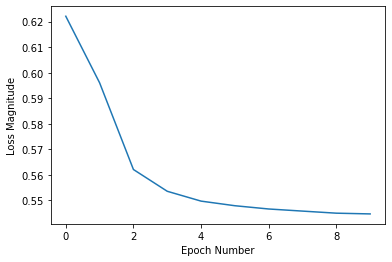

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

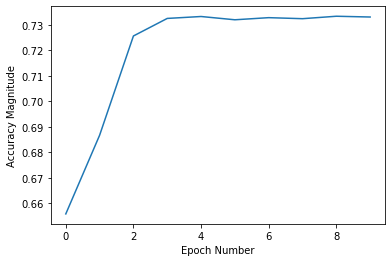

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy Magnitude")
plt.plot(history.history['accuracy'])

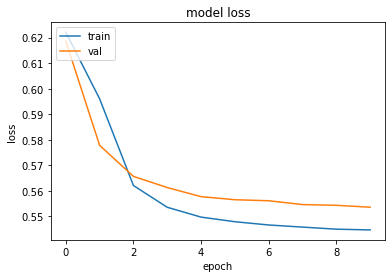

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

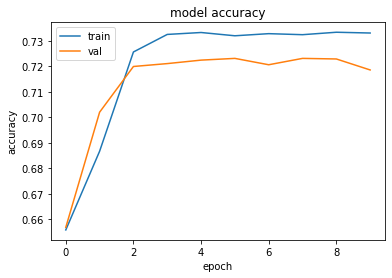

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Predicting the Test set results

In [18]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


### Making the Confusion Matrix


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4266 1168]
 [1747 3819]]


0.735